In [69]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

In [70]:
airfoil = "0018"
data = pd.read_csv("NACA " + airfoil + "/" + airfoil + ".csv").set_index("Alpha")
data

,C_l,C_d,C_m
Alpha,,,
-9.591837,-0.702894,0.101672,0.023703
-9.183673,-0.710882,0.092533,0.019267
-8.775510,-0.721126,0.083005,0.013764
-8.367347,-0.731118,0.073349,0.005678
-7.959184,-0.740251,0.061332,-0.005479
-7.551020,-0.739142,0.051656,-0.009915
-7.142857,-0.727873,0.043575,-0.011470
-6.734694,-0.715029,0.032907,-0.011052
-6.326531,-0.691497,0.024868,-0.009250


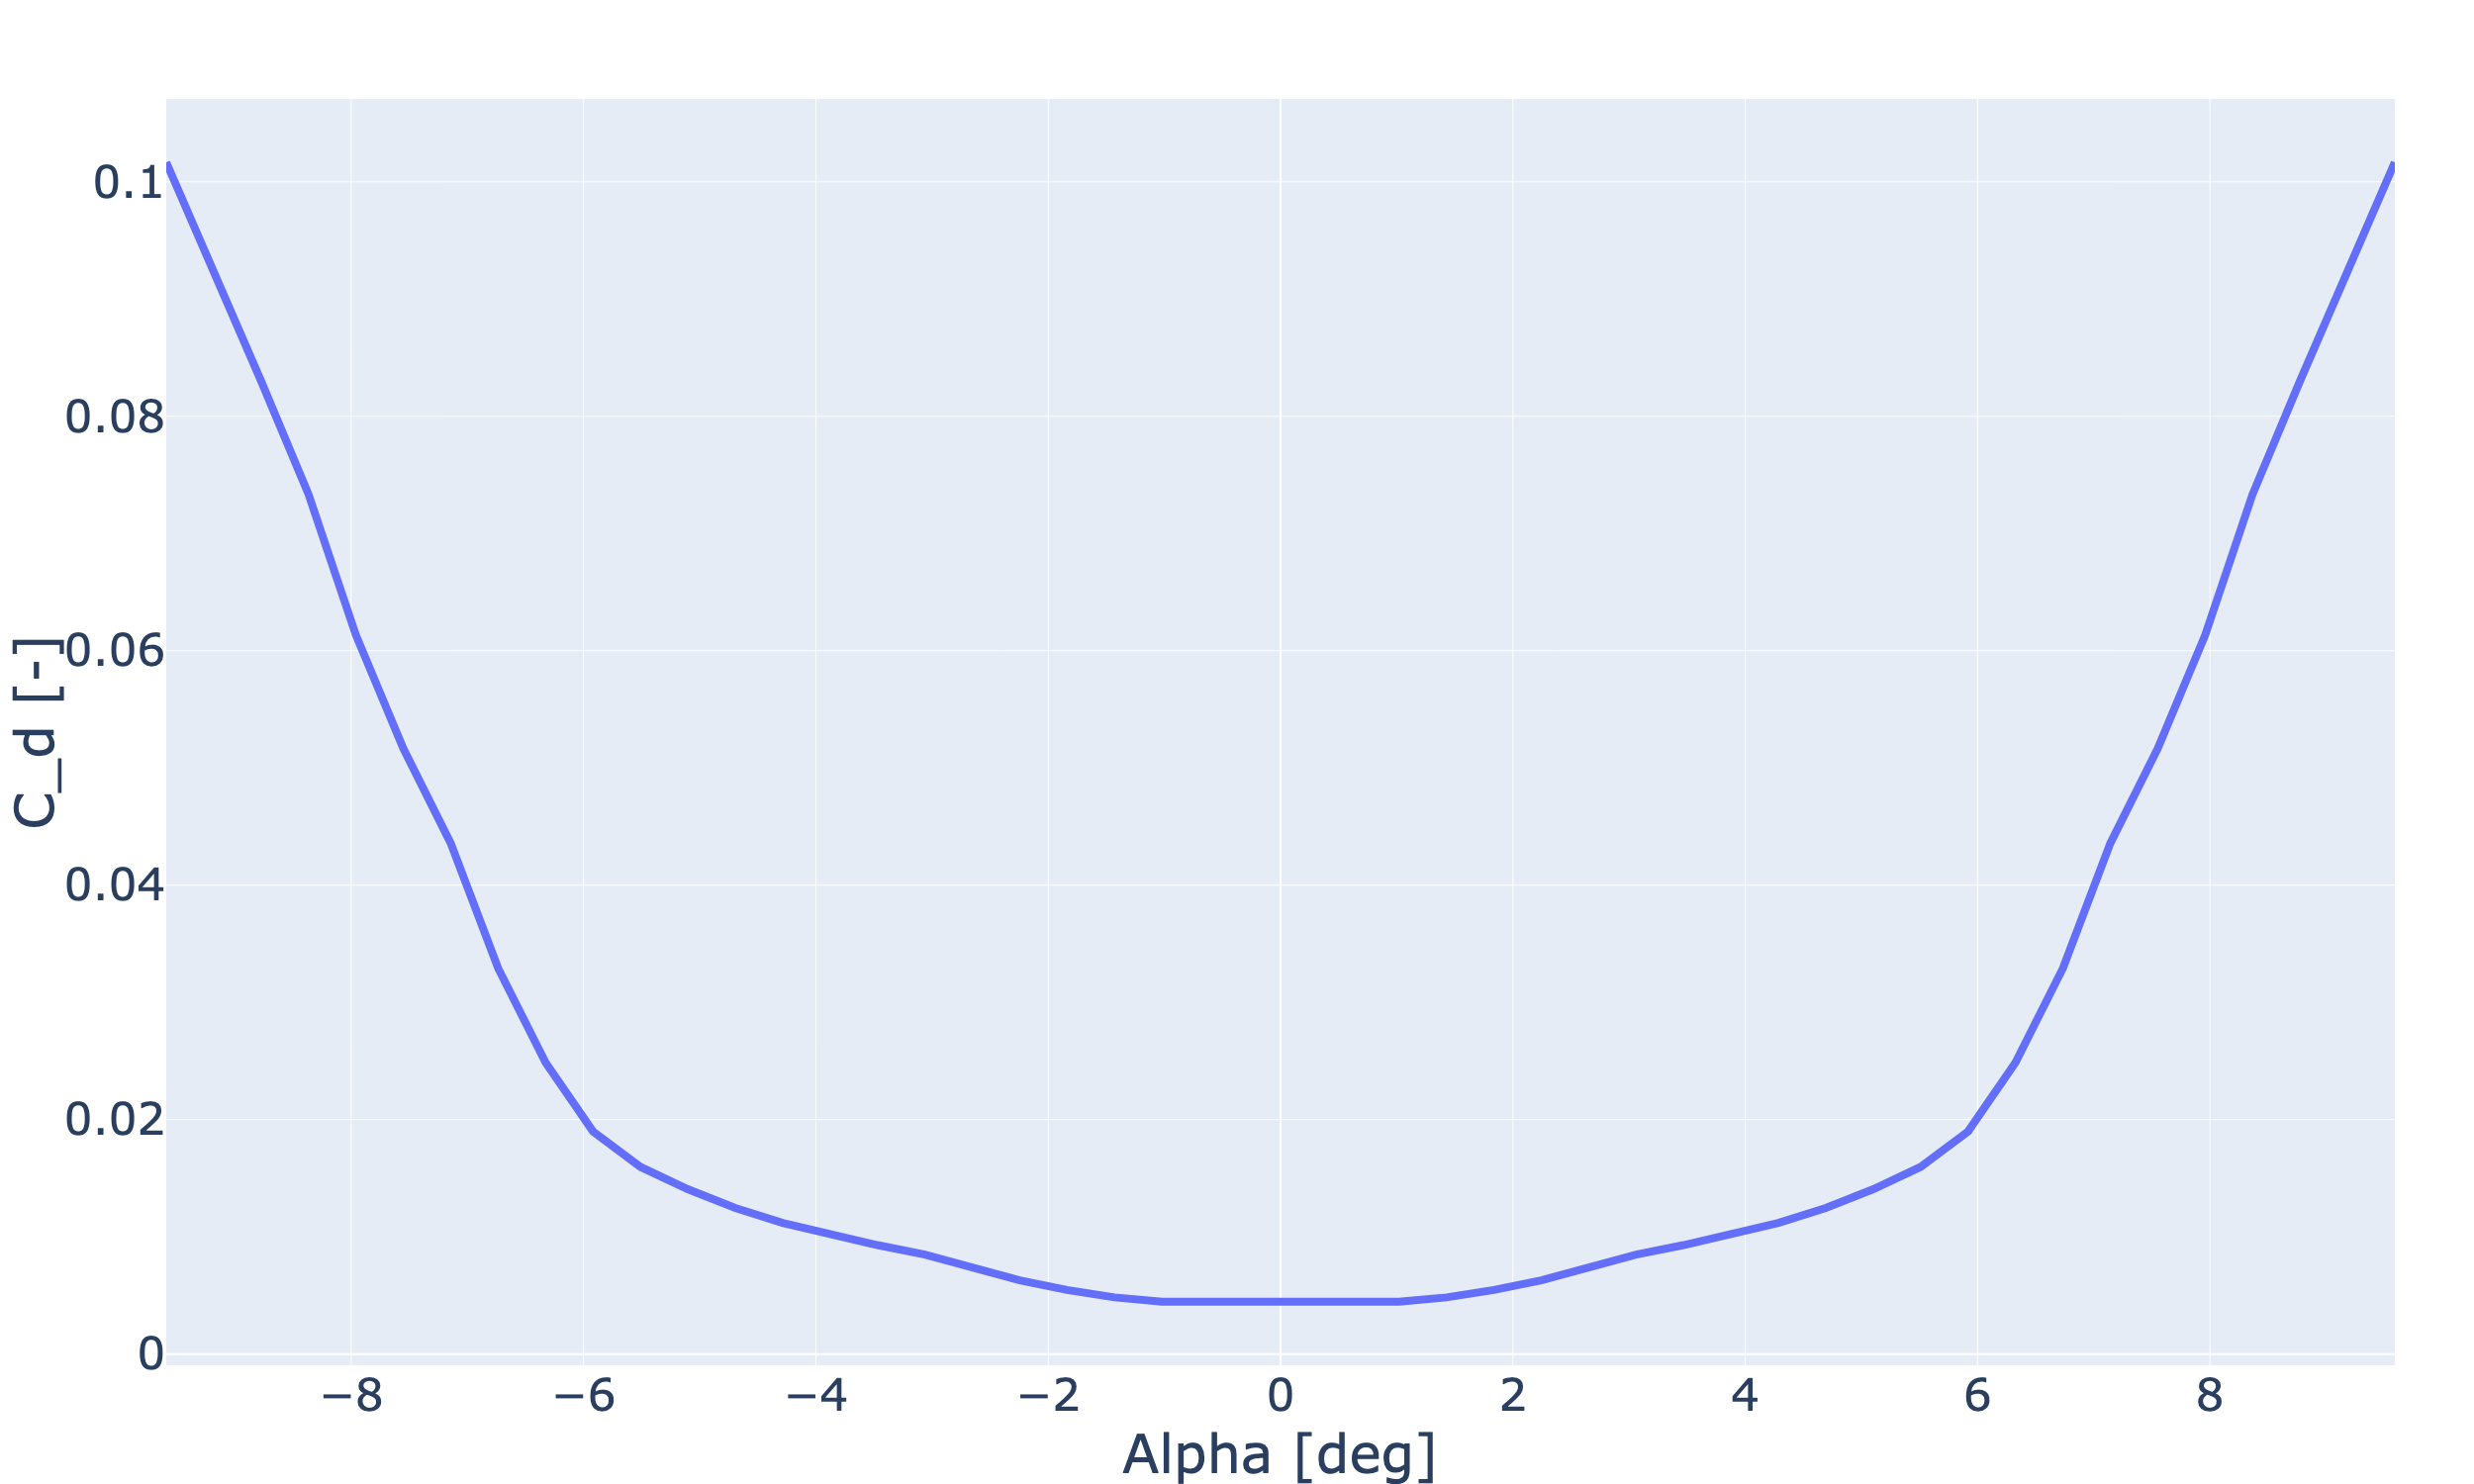

C_d'': 0.002062425577449632
C_d(0): 0.0044940737659989


In [71]:
cd_alpha = go.Figure()

cd_alpha.add_trace(
    go.Scatter(
        x=data.index,
        y=data["C_d"],
        mode="lines",
        name="Re = 587136",
        line=dict(
            width=8
        ),
    )
)
cd_alpha.update_layout(
    xaxis_title='Alpha [deg]',
    yaxis_title="C_d [-]",
    font=dict(
        # family='Open Sans',
        size=24
    )
)
cd_alpha.write_html("NACA " + airfoil + "/" + airfoil + '_cd_alpha.html')
cd_alpha.update_layout(
    xaxis_title='Alpha [deg]',
    yaxis_title="C_d [-]",
    font=dict(
        size=45
    )
)
cd_alpha.show('png', width=2500, height=1500)

cd_alpha_int = interp1d(data.index, data["C_d"])
cd_fit = np.polyfit(data.index, data["C_d"], 2)
print("C_d'':", 2*cd_fit[0])
print("C_d(0):", cd_alpha_int(0))


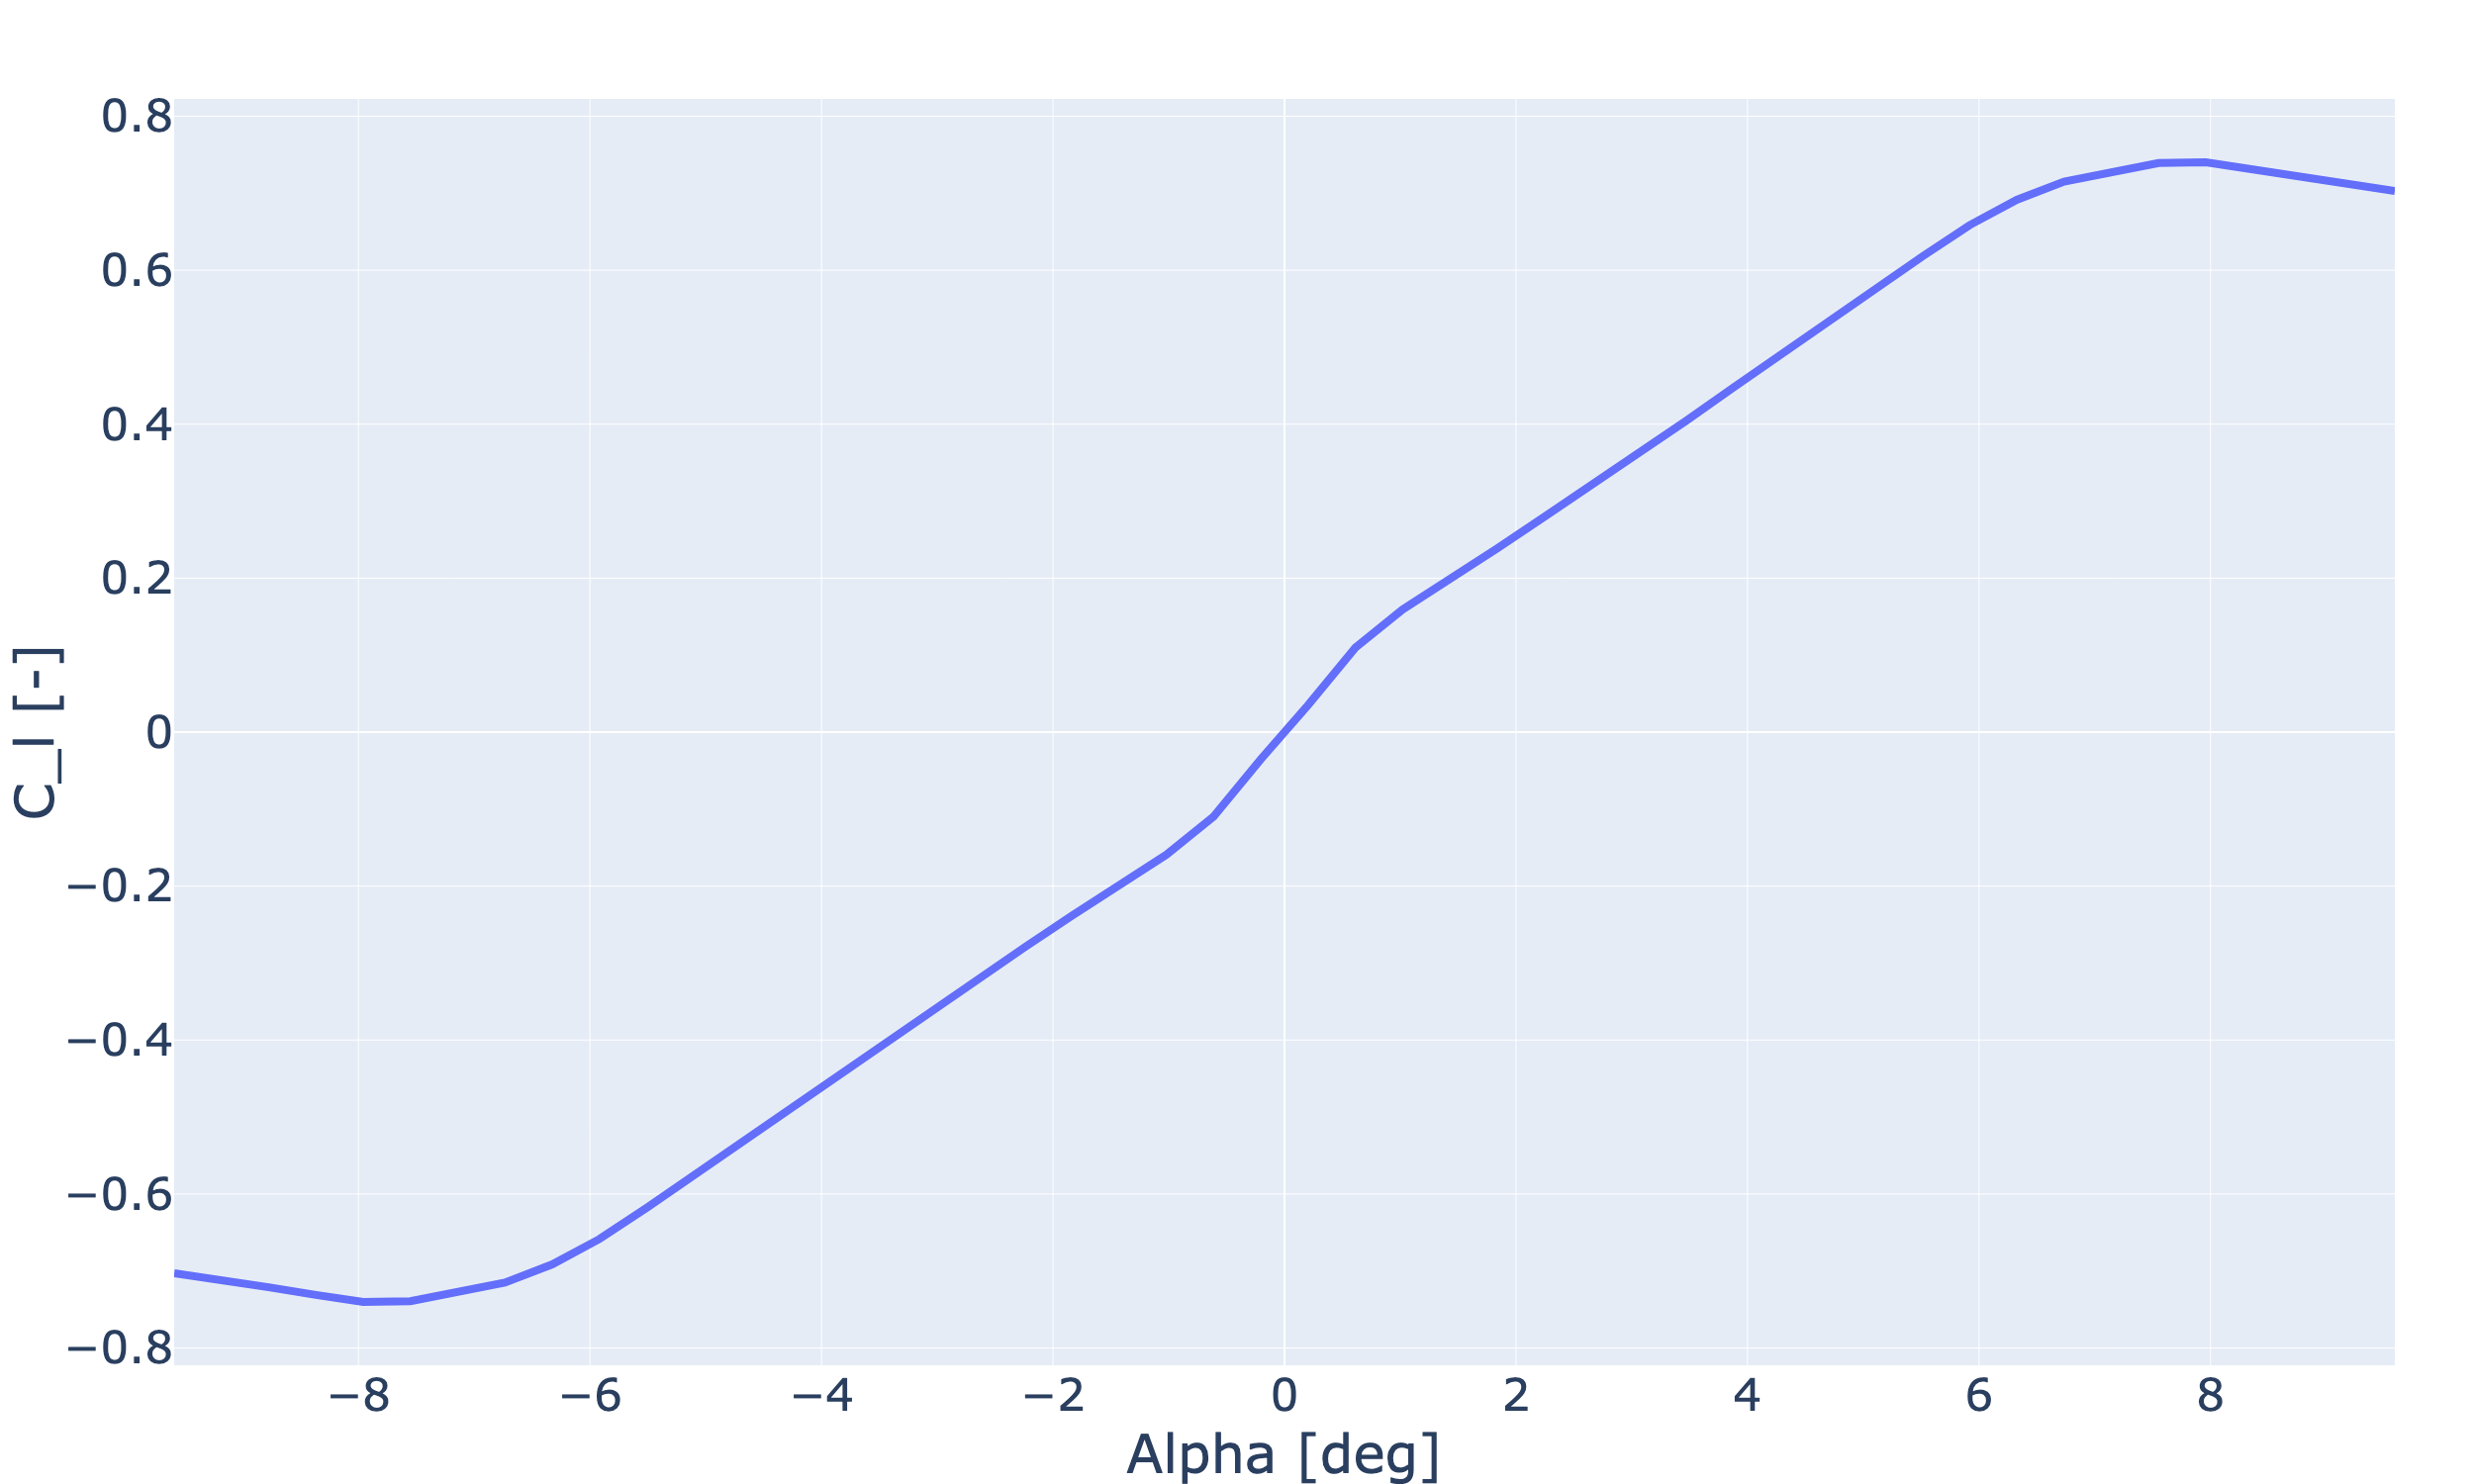

C_l': 0.115822533495673
C_l(0): -1.5110964562969897e-10


In [72]:
cl_alpha = go.Figure()

cl_alpha.add_trace(
    go.Scatter(
        x=data.index,
        y=data["C_l"],
        mode="lines",
        name="Re = 587136",
        line=dict(
            width=8
        ),
    )
)
cl_alpha.update_layout(
    xaxis_title='Alpha [deg]',
    yaxis_title="C_l [-]",
    font=dict(
        # family='Open Sans',
        size=24
    )
)
cl_alpha.write_html("NACA " + airfoil + "/" + airfoil + '_cl_alpha.html')
cl_alpha.update_layout(
    xaxis_title='Alpha [deg]',
    yaxis_title="C_l [-]",
    font=dict(
        size=45
    )
)
cl_alpha.show('png', width=2500, height=1500)

cl_alpha_int = interp1d(data.index, data["C_l"])
cl_fit = np.polyfit(data.iloc[10:-10].index, data.iloc[10:-10]["C_l"], 1)
print("C_l':", cl_fit[0])
print("C_l(0):", cl_alpha_int(0))


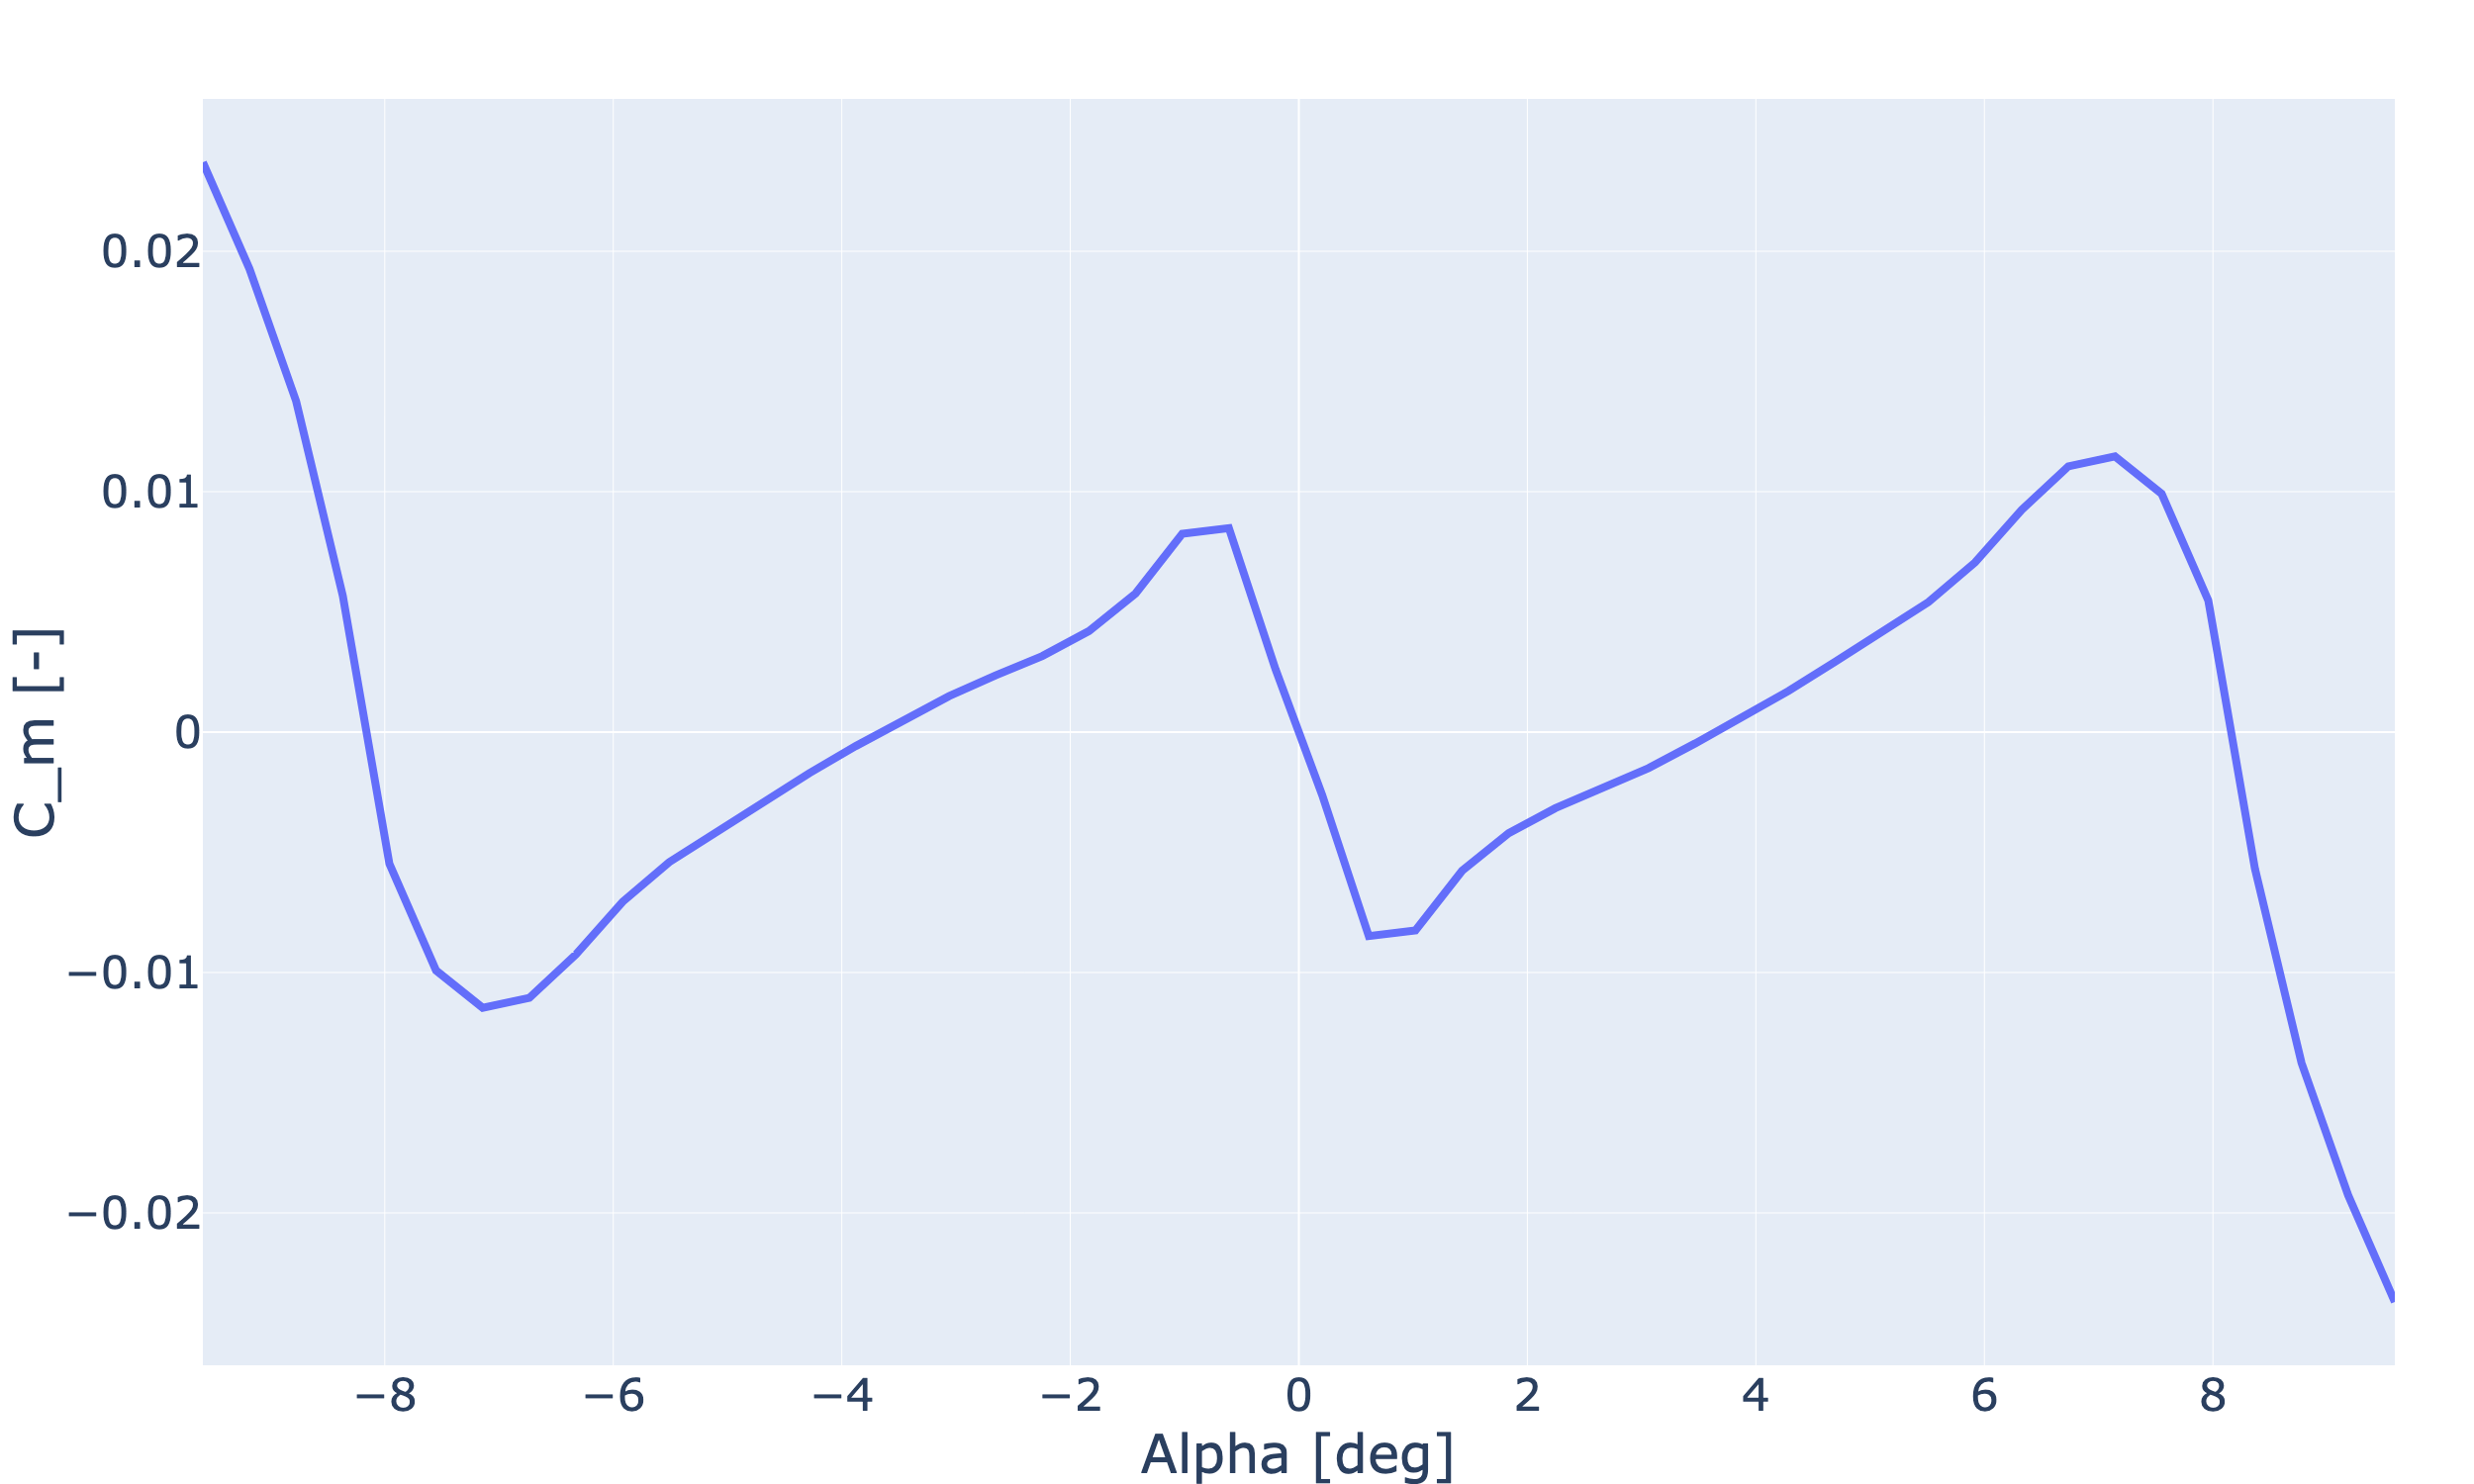

In [73]:
cm_alpha = go.Figure()

cm_alpha.add_trace(
    go.Scatter(
        x=data.index,
        y=data["C_m"],
        mode="lines",
        name="Re = 587136",
        line=dict(
            width=8
        ),
    )
)
cm_alpha.update_layout(
    xaxis_title='Alpha [deg]',
    yaxis_title="C_m [-]",
    font=dict(
        # family='Open Sans',
        size=24
    )
)
cm_alpha.update_layout(
    xaxis_title='Alpha [deg]',
    yaxis_title="C_m [-]",
    font=dict(
        size=45
    )
)
cm_alpha.show('png', width=2500, height=1500)
cm_alpha.write_html("NACA " + airfoil + "/" + airfoil + '_cm_alpha.html')

cm_alpha_int = interp1d(data.index, data["C_m"])
cm_fit = np.polyfit(data.index, data["C_m"], 1)